### Test migration history reconstruction on breast cancer data


In [1]:
import sys
import os

repo_dir = os.path.join(os.getcwd(), "../")

from metient.util.globals import *
from metient.metient import *

import matplotlib
import torch

matplotlib.rcParams['figure.figsize'] = [3, 3]
custom_colors = ["#6aa84f","#c27ba0", "#be5742e1", "#6fa8dc", "#e69138", "#9e9e9e"]
HOADLEY_DATA_DIR = os.path.join(repo_dir, 'data/hoadley_breast_cancer_2016')
MSK_MET_FN = os.path.join(repo_dir, 'data/msk_met/msk_met_freq_by_cancer_type.csv')
OUTPUT_DIR = os.path.join(repo_dir, 'data', 'hoadley_breast_cancer_2016', 'metient_outputs')

CUDA GPU: False


In [2]:
HOAD_MSK_MET_MAP = {
    "liver": "Liver",
    "brain": "CNS/Brain",
    "rib": "Bone",
    "breast": "Breast",
    "kidney": "Kidney",
    "lung": "Lung",
    "adrenal": "Adrenal Gland",
    "spinal": "CNS/Brain"
}

print_config = PrintConfig(visualize=True, verbose=True, k_best_trees=10)

def run_evaluate(patient_id, custom_colors, weights, run_name):
    mut_trees_fn = os.path.join(HOADLEY_DATA_DIR, "orchard_trees", f"{patient_id}.results.npz")
    ref_var_fn = os.path.join(HOADLEY_DATA_DIR, "pyclone_clustered_tsvs", f"{patient_id}_clustered_SNVs.tsv")
    _, _, _, unique_sites, _, _ = dutil.get_ref_var_omega_matrices(ref_var_fn)
    trees = get_adj_matrices_from_pairtree_results(mut_trees_fn)
    print("num trees:", len(trees))
    print(unique_sites)
    tree_num = 1
    for adj_matrix in trees[:1]:
        print(f"\nTREE {tree_num}")
        O = get_organotropism_matrix_from_msk_met(unique_sites, "Breast Cancer", MSK_MET_FN, HOAD_MSK_MET_MAP)
        print("organotropism",O)
        if weights.organotrop == 0.0: O = None
        
        evaluate(adj_matrix,  ref_var_fn,weights, print_config, OUTPUT_DIR, f"{run_name}_tree{tree_num}",
                 O=O, bias_weights=True, custom_colors=custom_colors, solve_polytomies=False)
        tree_num += 1



### Patient A1, evaluate mode, maximum parsimony objective

num trees: 2
['adrenal', 'breast', 'liver', 'lung', 'spinal']

TREE 1
organotropism tensor([0.0145, 0.0224, 0.1236, 0.0797, 0.0569])
Calculated batch size: 768
Restructuring adjacency matrix for A1_eval_tree1_breast since root node is not at index 0


/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:304: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)
  0%|          | 0/75 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:295: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
100%|██████████| 75/75 [00:45<00:00,  1.66it/s]


Time elapsed: 45.428109
# final solutions: 4


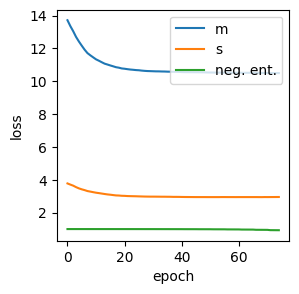

A1_eval_tree1_breast
10 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

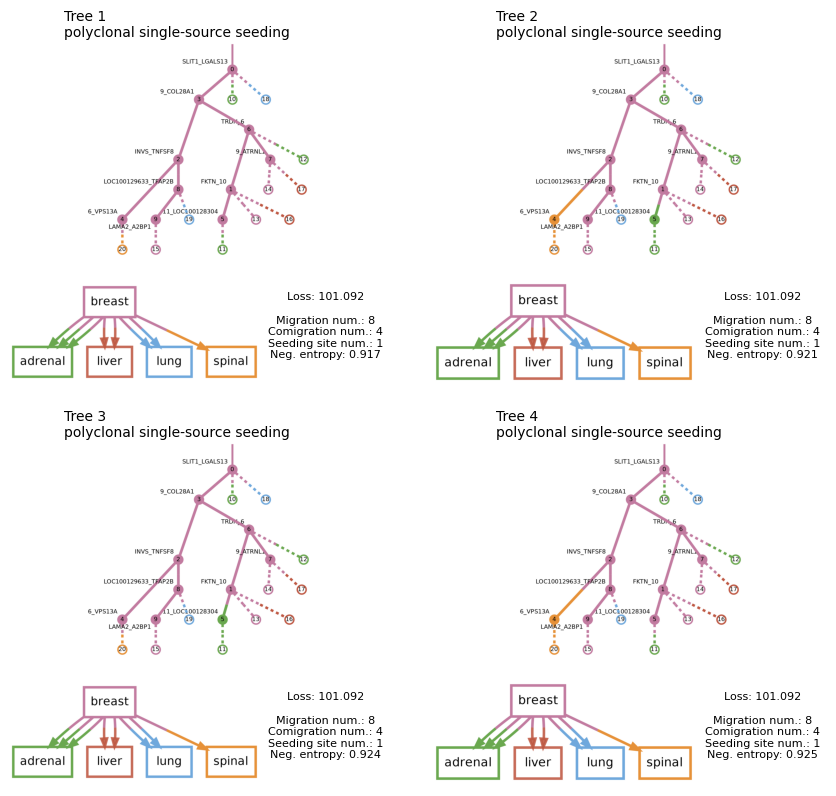

Saving A1_eval_tree1_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/hoadley_breast_cancer_2016/metient_outputs


In [3]:
weights = Weights(mig=10.0, comig=5.0, seed_site=1.0, gen_dist=0.0, organotrop=0.0)
run_evaluate("A1", custom_colors, weights, "A1_eval")


### Patient A1, maximum parsimony + gen. dist. objective

num trees: 2
['adrenal', 'breast', 'liver', 'lung', 'spinal']

TREE 1
organotropism tensor([0.0145, 0.0224, 0.1236, 0.0797, 0.0569])
Calculated batch size: 768
Restructuring adjacency matrix for A1_eval_gd_tree1_breast since root node is not at index 0


/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:304: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)
  0%|          | 0/75 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:295: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
100%|██████████| 75/75 [00:49<00:00,  1.50it/s]


Time elapsed: 50.298357
# final solutions: 4


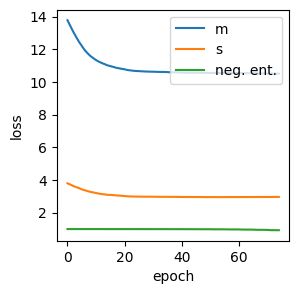

A1_eval_gd_tree1_breast
10 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

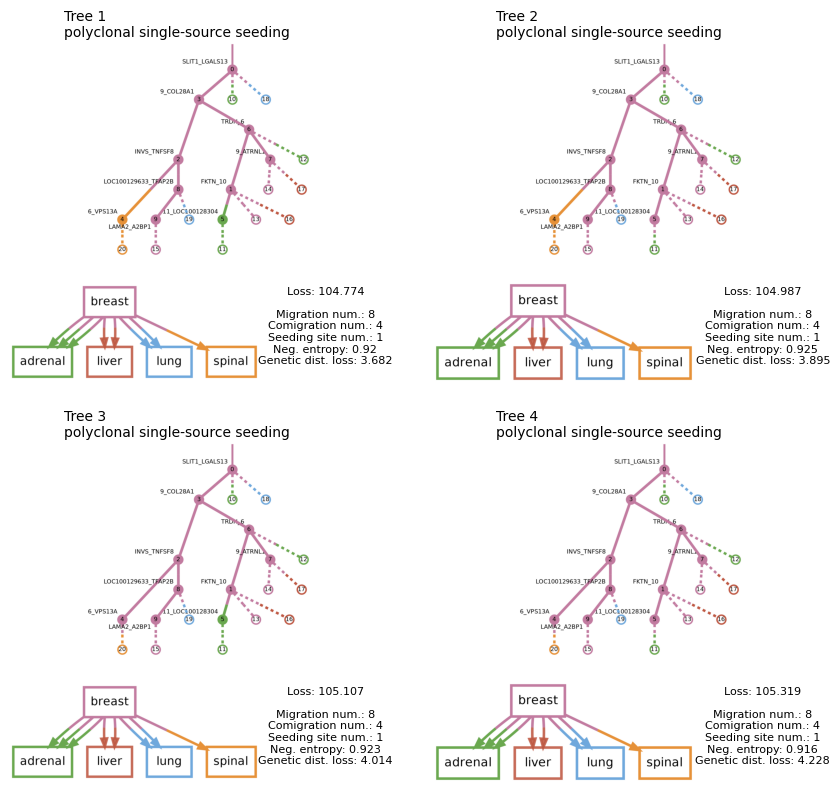

Saving A1_eval_gd_tree1_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/hoadley_breast_cancer_2016/metient_outputs


In [4]:
weights = Weights(mig=10.0, comig=5.0, seed_site=1.0, reg=3.0, gen_dist=1.0, organotrop=0.0)
run_evaluate("A1", custom_colors, weights, "A1_eval_gd")

### Patient A1, maximum parsimony + gen. dist. + organotropism objective

num trees: 2
['adrenal', 'breast', 'liver', 'lung', 'spinal']

TREE 1
organotropism tensor([0.0145, 0.0224, 0.1236, 0.0797, 0.0569])
Calculated batch size: 768
Restructuring adjacency matrix for A1_eval_gd_organo_tree1_breast since root node is not at index 0


100%|██████████| 75/75 [00:54<00:00,  1.36it/s]


Time elapsed: 55.589367
# final solutions: 4


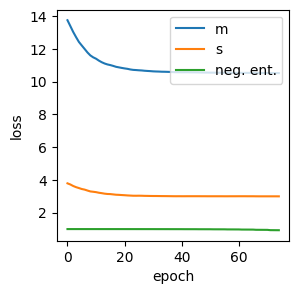

A1_eval_gd_organo_tree1_breast
10 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

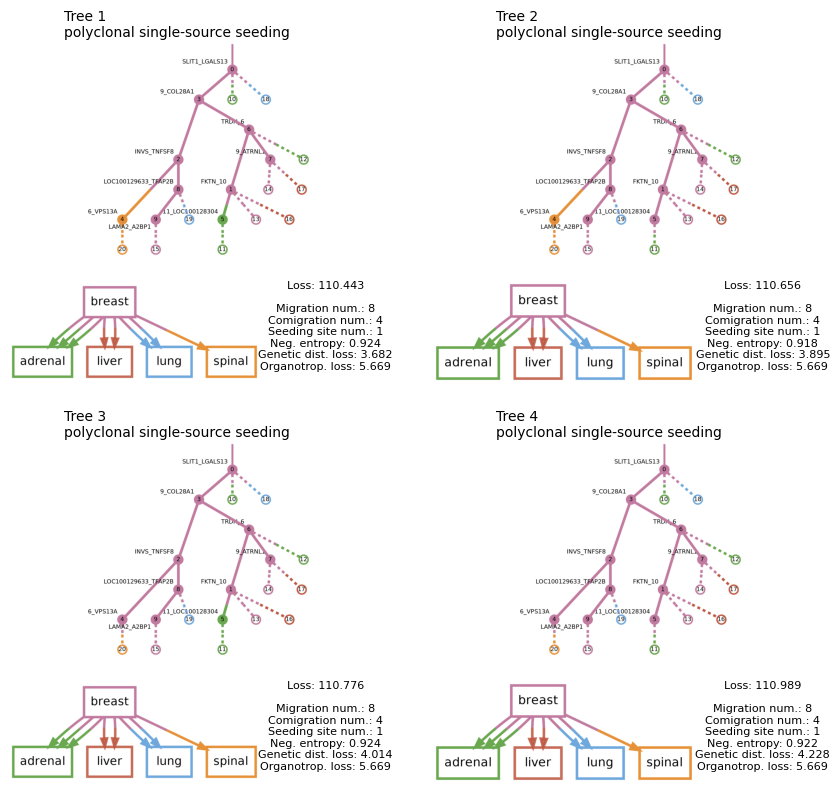

Saving A1_eval_gd_organo_tree1_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/hoadley_breast_cancer_2016/metient_outputs


In [10]:
weights = Weights(mig=10.0, comig=5.0, seed_site=1.0, reg=3.0, gen_dist=1.0, organotrop=1.0)
run_evaluate("A1", custom_colors, weights, "A1_eval_gd_organo")

### Patient A7, evaluate mode, maximum parsimony objective

num trees: 1
['brain', 'breast', 'kidney', 'liver', 'lung', 'rib']

TREE 1
organotropism tensor([0.0569, 0.0224, 0.0064, 0.1236, 0.0797, 0.1671])
Calculated batch size: 1024
Restructuring adjacency matrix for A7_eval_tree1_breast since root node is not at index 0


100%|██████████| 75/75 [01:04<00:00,  1.17it/s]


Time elapsed: 64.459879
# final solutions: 10


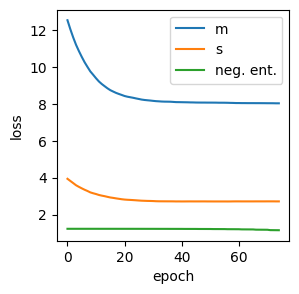

A7_eval_tree1_breast


<Figure size 300x300 with 0 Axes>

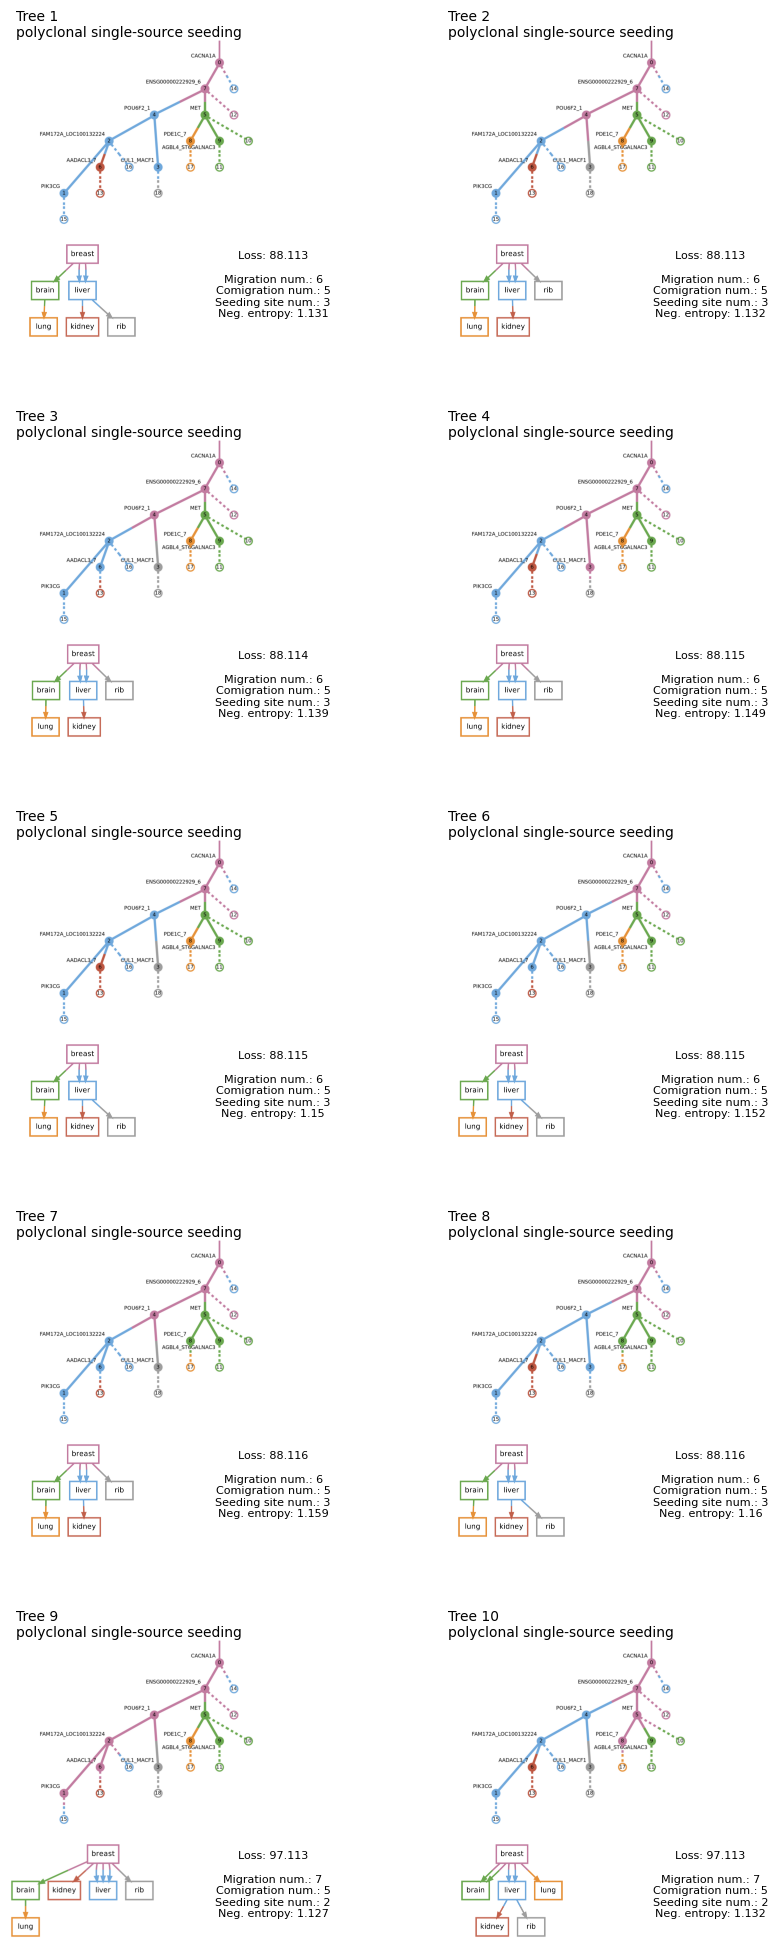

Saving A7_eval_tree1_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/hoadley_breast_cancer_2016/metient_outputs


In [6]:
weights = Weights(mig=10.0, comig=5.0, seed_site=1.0, gen_dist=0.0, organotrop=0.0)
run_evaluate("A7", custom_colors, weights, "A7_eval")

### Patient A7, evaluate mode, maximum parsimony + gen. dist. objective

num trees: 1
['brain', 'breast', 'kidney', 'liver', 'lung', 'rib']

TREE 1
organotropism tensor([0.0569, 0.0224, 0.0064, 0.1236, 0.0797, 0.1671])
Calculated batch size: 1024
Restructuring adjacency matrix for A7_eval_gd_tree1_breast since root node is not at index 0


100%|██████████| 75/75 [01:03<00:00,  1.17it/s]


Time elapsed: 64.328572
# final solutions: 10


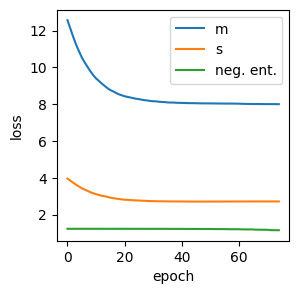

A7_eval_gd_tree1_breast


<Figure size 300x300 with 0 Axes>

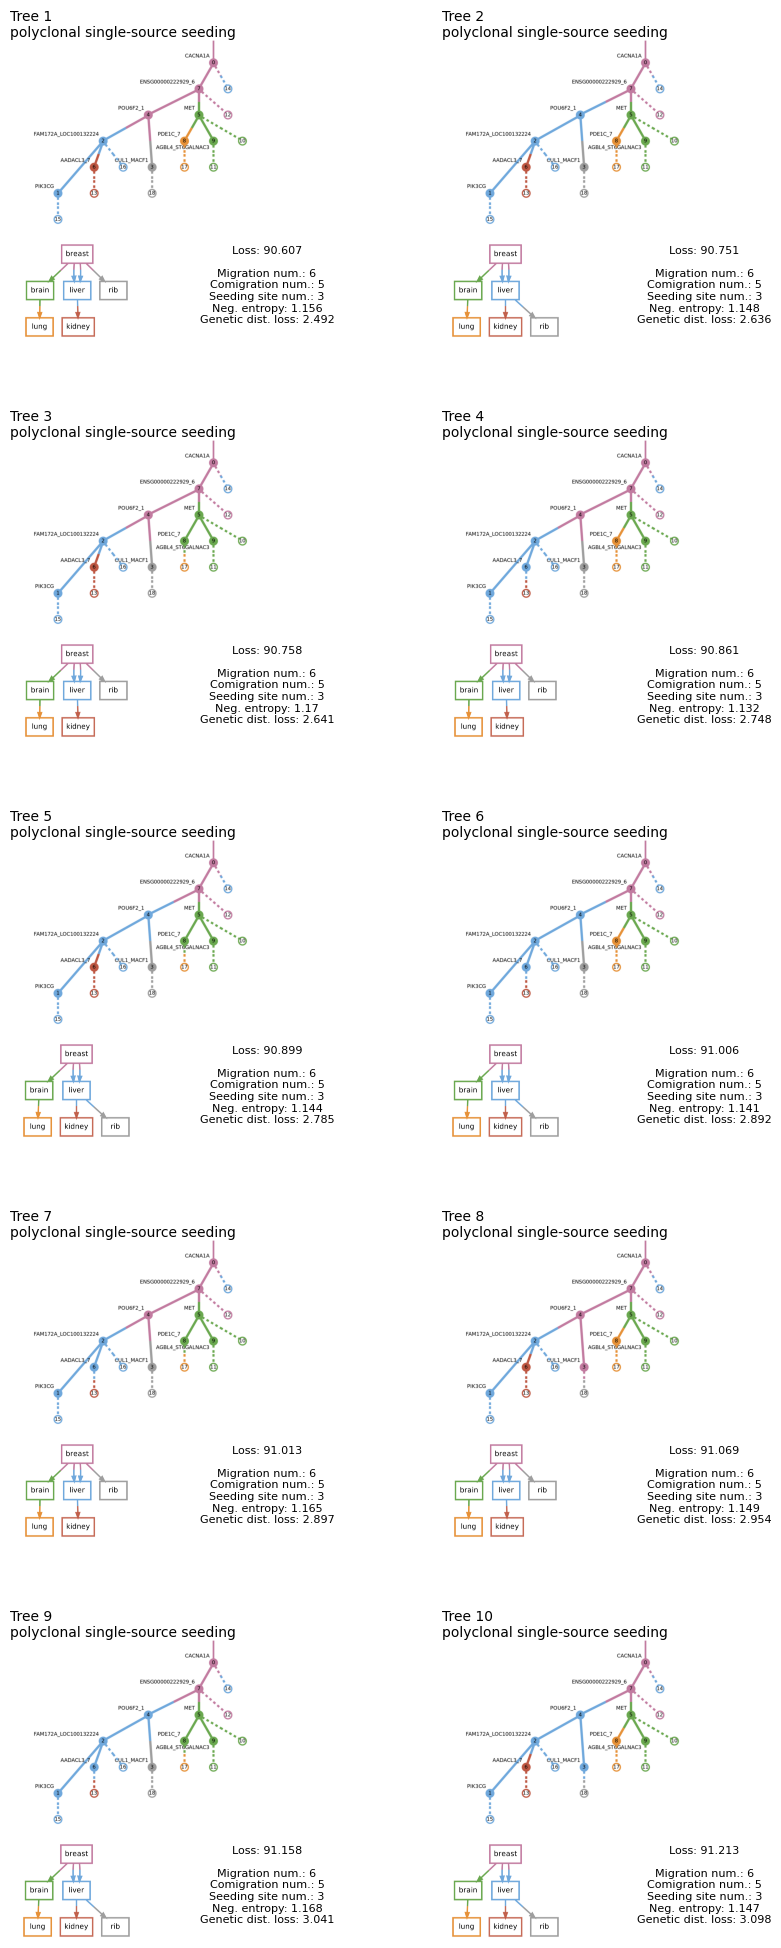

Saving A7_eval_gd_tree1_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/hoadley_breast_cancer_2016/metient_outputs


In [7]:
weights = Weights(mig=10.0, comig=5.0, seed_site=1.0, gen_dist=1.0, organotrop=0.0)
run_evaluate("A7", custom_colors, weights, "A7_eval_gd")

### Patient A7, evaluate mode, maximum parsimony + gen. dist. + organotropism objective

num trees: 1
['brain', 'breast', 'kidney', 'liver', 'lung', 'rib']

TREE 1
organotropism tensor([0.0569, 0.0224, 0.0064, 0.1236, 0.0797, 0.1671])
Calculated batch size: 1024
Restructuring adjacency matrix for A7_eval_gd_organo_tree1_breast since root node is not at index 0


100%|██████████| 75/75 [01:12<00:00,  1.04it/s]


Time elapsed: 72.469447
# final solutions: 5


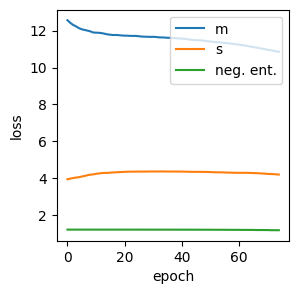

A7_eval_gd_organo_tree1_breast
10 unique trees were not found (5 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

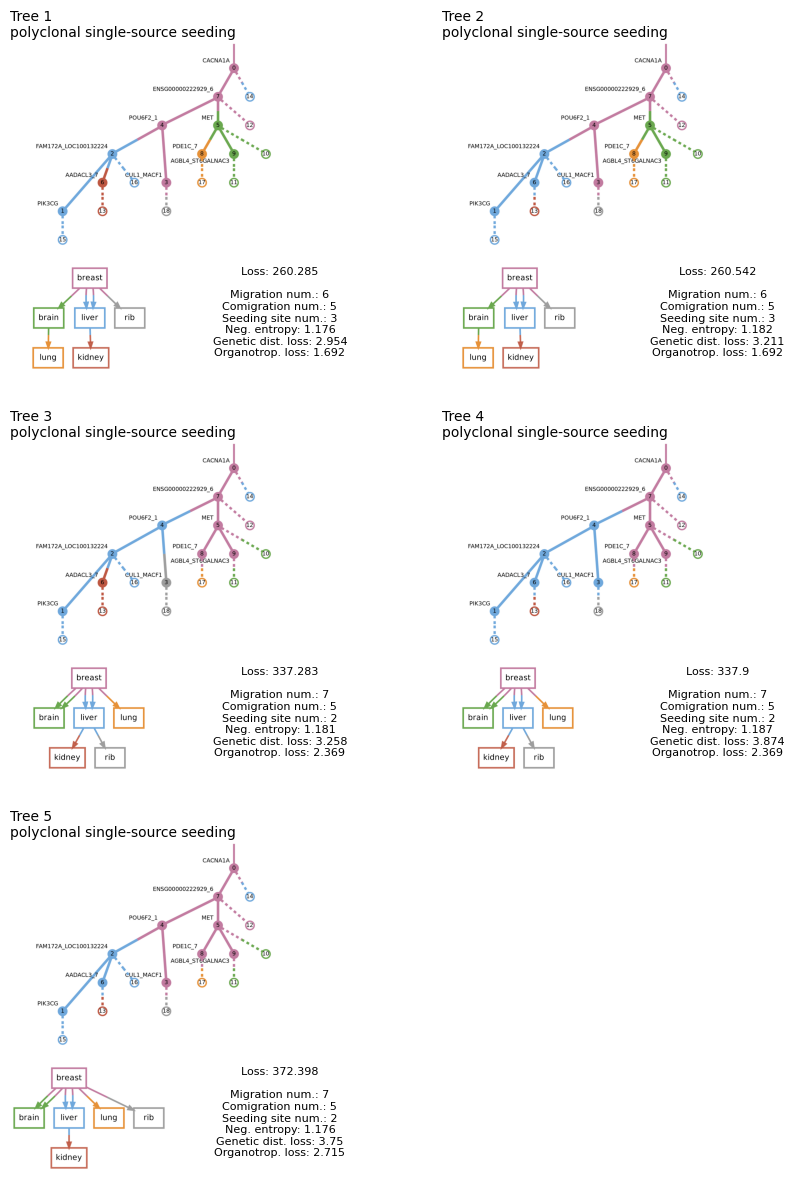

Saving A7_eval_gd_organo_tree1_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/hoadley_breast_cancer_2016/metient_outputs


In [8]:
weights = Weights(mig=10.0, comig=5.0, seed_site=1.0, gen_dist=1.0, organotrop=100.0)
run_evaluate("A7", custom_colors, weights, "A7_eval_gd_organo")

### All patients in calibrate mode

tensor([0.0145, 0.0224, 0.1236, 0.0797, 0.0569])
tensor([0.0569, 0.0224, 0.0064, 0.1236, 0.0797, 0.1671])
Saving results to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/hoadley_breast_cancer_2016/metient_outputs/calibrate
Overwriting existing directory at /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/hoadley_breast_cancer_2016/metient_outputs/calibrate
Calibrating for patient: A1_calibrate
Calculated batch size: 768
Restructuring adjacency matrix for A1_calibrate_breast since root node is not at index 0


100%|██████████| 75/75 [00:38<00:00,  1.94it/s]


Time elapsed: 39.021033
# final solutions: 3
Saving A1_calibrate_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/hoadley_breast_cancer_2016/metient_outputs/calibrate
Calibrating for patient: A7_calibrate
Calculated batch size: 1024
Restructuring adjacency matrix for A7_calibrate_breast since root node is not at index 0


100%|██████████| 75/75 [00:48<00:00,  1.55it/s]


Time elapsed: 48.81898
# final solutions: 66
Saving A7_calibrate_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/hoadley_breast_cancer_2016/metient_outputs/calibrate
Calibrating to 2 patients
Optimized thetas: tensor([0.3819, 0.3344, 0.2837], grad_fn=<DivBackward0>)
A1_calibrate_breast
10 unique trees were not found (3 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

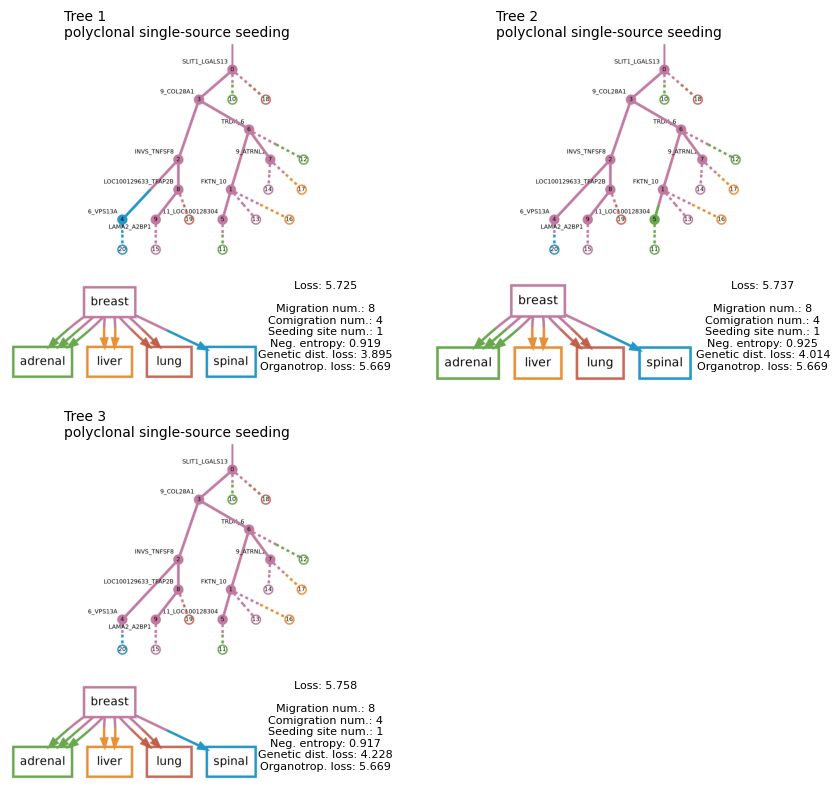

Saving A1_calibrate_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/hoadley_breast_cancer_2016/metient_outputs/calibrate
A7_calibrate_breast


<Figure size 300x300 with 0 Axes>

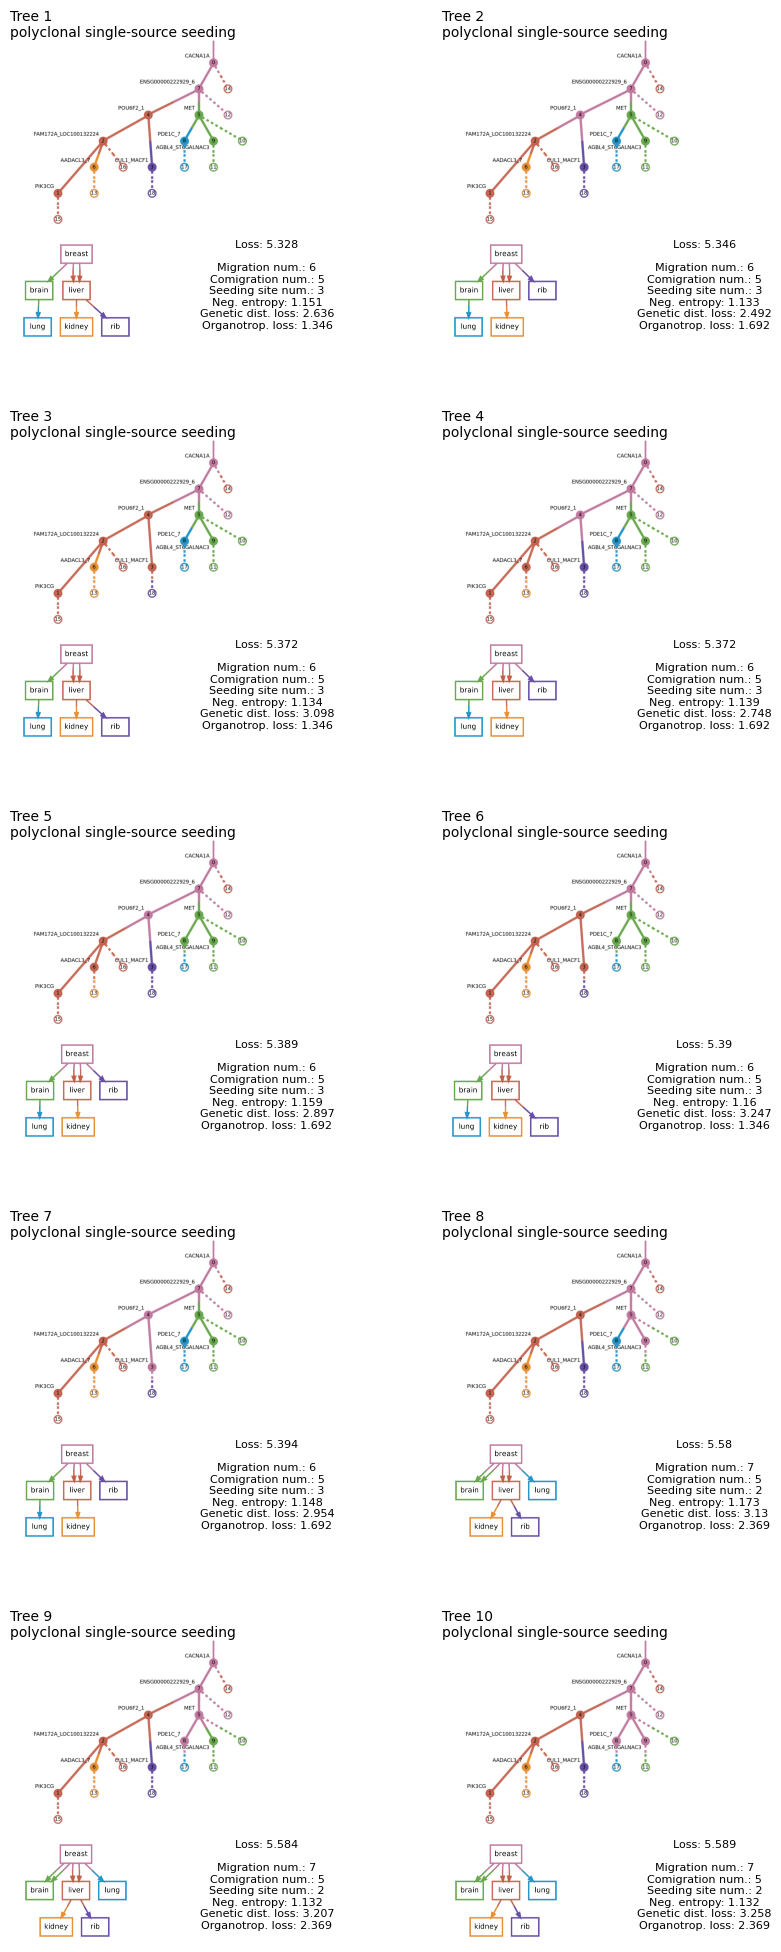

Saving A7_calibrate_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/hoadley_breast_cancer_2016/metient_outputs/calibrate


[0.38191622495651245, 0.3344133496284485, 0.2836703956127167]

In [9]:
PATIENT_IDS = ["A1", "A7"]

mut_trees_fns = [os.path.join(HOADLEY_DATA_DIR, "orchard_trees",f"{patient_id}.results.npz") for patient_id in PATIENT_IDS]
trees = [data[0] for data in get_adj_matrices_from_pairtree_results(mut_trees_fns)]
ref_var_fns = [os.path.join(HOADLEY_DATA_DIR, "pyclone_clustered_tsvs", f"{patient_id}_clustered_SNVs.tsv") for patient_id in PATIENT_IDS]
run_names = [f"{pid}_calibrate" for pid in PATIENT_IDS]
Os = []
for ref_var_fn in ref_var_fns:
    _, _, _, unique_sites, _, _ = dutil.get_ref_var_omega_matrices(ref_var_fn)
    O = get_organotropism_matrix_from_msk_met(unique_sites, "Breast Cancer", MSK_MET_FN, HOAD_MSK_MET_MAP)
    print(O)
    Os.append(O)
    
calibrate(trees, ref_var_fns, print_config, OUTPUT_DIR, run_names, Os=Os)

In [ ]:
import pandas as pd
clonality_data = []
label_map = {0:"Absent", 1:"Subclonal", 2:"Clonal"}
num_subclones = clonality_matrix.shape[1]
for i in range(num_subclones):
    subclone_col = clonality_matrix[:,i]
    clonality_data.append([i]+[label_map[k] for k in subclone_col])

site_labels = [f"{site.capitalize()} Primary" if i == 0 else f"{site.capitalize()} Metastasis" for i, site in enumerate(unique_sites)]
clonality_df = pd.DataFrame(clonality_data, columns=["Subclone"]+site_labels)
clonality_df


In [ ]:
# we call mutations with CCF>0.5 as clonal mutations, mutations with CCF<=0.5 and CCF>0.1 are subclonal
# breast vs. liver
from matplotlib import pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 3, figsize=(15, 8), constrained_layout=True)
y = "Breast Primary"

c = 1
for i in [0,1]:
    for j in [0,1,2]:
        if c == len(clonality_df.columns): break
        x = clonality_df.columns[c]
        print(x)

        ax = sns.swarmplot(ax=axes[i,j], data=clonality_df, x=x, y=y, 
                           order=["Absent", "Subclonal", "Clonal"], size=10, 
                           hue="Subclone")
        sns.despine(offset=0, trim=True)
        ax.set_xlabel(x, fontsize=11)
        ax.set_ylabel(y, fontsize=11)
        ax.get_legend().remove()
        # there is only one axes for this plot; provide an alias for ease of use
#         ax.set_yticks(["Absent", "Subclonal", "Clonal"])
        # get the ytick locations for each name
        point_locs = []
        for path in ax.collections:
            point_locs.append(path.get_offsets())
            #print(path.get_label())

        point_locs = [list(item) for sublist in point_locs for item in sublist]
        c += 1
fig.suptitle(f"Metastasizing Clones", x=0.33, y=0.95, horizontalalignment='left', verticalalignment='top', fontsize=14, fontweight='bold')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=num_subclones)
    # for i, point_loc in enumerate(point_locs):
    #     ax.text(point_loc[0], point_loc[1]+0.05, str(i))
    # for i in range(num_subclones):
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)


In [ ]:
U_clip = [[0.4769335091114044, 0.5134045481681824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.3397281765937805, 0.0, 0.0, 0.0, 0.2556871175765991, 0.0, 0.0, 0.0, 0.0, 0.0, 0.36632010340690613], [0.5697565078735352, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.40199223160743713, 0.0, 0.0], [0.1478603333234787, 0.0, 0.0, 0.06622103601694107, 0.0, 0.400208055973053, 0.0, 0.0, 0.0, 0.3738396167755127, 0.0], [0.3028472065925598, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.593723714351654, 0.0, 0.0, 0.0], [0.27643024921417236, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7042533159255981, 0.0, 0.0, 0.0, 0.0]]
sites = ['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
prevalence_df = pd.DataFrame(U_clip, columns=["norm"] + [str(i) for i in range(len(U_clip[0])-1)], index=sites)
prevalence_df=prevalence_df.stack().reset_index().rename(columns={'level_0':'sample_id','level_1':'clone_id', 0:'clonal_prev'})
prevalence_df


In [ ]:
edges= [("norm", "0"), ('0', '1'), ('0', '3'), ('1', '2'), ('1', '5'), ('2', '4'), ('3', '6'), ('3', '9'), ('4', '7'), ('4', '8')]
tree_df = pd.DataFrame(edges, columns=["source", "target"])
tree_df


In [ ]:
x_coords = [205, 293, 440, 244, 405, 290]
y_coords = [660, 126, 835, 806, 624, 450]
sample_locs = pd.DataFrame([sites, sites, x_coords, y_coords]).T
sample_locs.columns = ["sample_id", "location_id", "x", "y"]
sample_locs

In [ ]:
sample_locs.to_csv(os.path.join(HOADLEY_DATA_DIR, "A7", "sample_locs.csv"), index=False)
tree_df.to_csv(os.path.join(HOADLEY_DATA_DIR, "A7","tree_df.csv"), index=False)
prevalence_df.to_csv(os.path.join(HOADLEY_DATA_DIR, "A7", "prevalence_df.csv"), index=False)

In [ ]:
HOADLEY_DATA_DIR

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R -i prevalence_df
library(mapscape)
hoadley_dir<-"/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/data/hoadley_breast_cancer_2016/A7/"
# clonal prevalences
clonal_prev <- read.csv(file.path(hoadley_dir, "prevalence_df.csv"))
print(clonal_prev)
# locations of each tumour sample on user-provided image
sample_locations <- read.csv(file.path(hoadley_dir, "sample_locs.csv"))
# genotype tree edges
tree_edges <- read.csv(file.path(hoadley_dir, "tree_df.csv"))
# image reference
img_ref <- file.path(hoadley_dir, "anatomical_sites.png")
# radial order of samples
sample_ids <- c('breast', 'brain', 'kidney', 'liver', 'lung', 'rib')
# run mapscape
mapscape(clonal_prev = clonal_prev, tree_edges = tree_edges, sample_locations = sample_locations, 
img_ref = img_ref,show_warnings=TRUE)

# library(mapscape)
# hoadley_dir <- "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/data/hoadley_breast_cancer_2016/A7"
# mapscape(clonal_prev = prevalence_df, tree_edges=tree_df, sample_locations=sample_locs, img_ref=file.path(hoadley_dir, "anatomical_sites.png"))


In [ ]:
%%R -i prevalence_df
library(mapscape)
